## Explore Wine Data 

### imports

In [127]:
! pip install plotly

import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn 
from sklearn import preprocessing as prep
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer 
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.spatial.distance import cdist


### Load

In [4]:
whiteWine = "../data/cleaned_all_wine_3.0.xlsx"
redWine = "../data/cleaned_red_wine_3.0.xlsx" 
allWine = "../data/cleaned_all_wine_3.0.xlsx"

DfWhiteWine = pandas.read_excel(whiteWine)
DfRedWine = pandas.read_excel(redWine)
DfAllWine = pandas.read_excel(allWine)

In [8]:
DfAllWine.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white


### Describing the independent and dependent variable 
#### we suspect that all the column besides "Quality" is our independent variable

#### Because our Quality depends on all the other catagories/columns so its our Dependent variable


##### checking the value counts on the wine type

In [9]:
DfAllWine['wine_type'].value_counts()

wine_type
white    4898
red      1599
Name: count, dtype: int64

checking the type of columns - i want to see the wine_type 

In [10]:
DfAllWine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

##### Change the wine_type from object- to catagory-type

In [12]:
DfAllWine["wine_type"] = DfAllWine["wine_type"].astype("category")
DfAllWine.dtypes

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
ph                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type               category
dtype: object

### Label encoding / makes the wine_type into a code. 

In [20]:
# makes an new column from "species" called "species_cat" 
# and the .codes makes the data into numbers/int8 so it gives every specific catagory name a number from 0-99.... instead  
DfAllWine["wine_type_catagory_code"] = DfAllWine["wine_type"].cat.codes
DfAllWine.head(10)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_type_catagory_code
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white,1


In [ ]:

DfAllWine.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_type_catagory_code
6487,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5,red,0
6488,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,red,0
6489,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,red,0
6490,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,0
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,0
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,red,0


### Calculate descriptive statistics 

### checking if we have a normal/symmetric value/attributes or they are not normal/asymmetric

In [80]:
# descipes() gives us all the descriptive statistics in the dataFrame
DfAllWine.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type_catagory_code
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
#DfAllWine["fixed_acidity"].hist() # asymmetric / not normal
#DfAllWine["volatile_acidity"].hist() # asymmetric / not normal
#DfAllWine["citric_acid"].hist() # asymmetric / not normal
#DfAllWine["residual_sugar"].hist() # asymmetric / not normal
#DfAllWine["chlorides"].hist() # asymmetric / not normal
#DfAllWine["free_sulfur_dioxide"].hist() # asymmetric / not normal
#DfAllWine["total_sulfur_dioxide"].hist() # asymmetric / not normal
#DfAllWine["density"].hist() # asymmetric / not normal
#DfAllWine["ph"].hist() # asymmetric / not normal
#DfAllWine["sulphates"].hist() # asymmetric / not normal
#DfAllWine["alcohol"].hist() # asymmetric / not normal
#DfAllWine["quality"].hist() # asymmetric / not normal
#DfAllWine["wine_type"].hist() # asymmetric / not normal
#DfAllWine["wine_type_catagory_code"].hist() # asymmetric / not normal


## dobbelcheck with Q-Q plot diagram
#from scipy import stats
#import matplotlib.pyplot as plt

#stats.probplot(DfAllWine['ph'], dist="norm", plot=plt)
#plt.title('Q-Q Plot')
#plt.show()


### Showing the difference in the mean value of the quality, alchohol and residual_sugar

In [64]:
qualRed = DfRedWine["quality"].mean() 
qualWhite = DfWhiteWine["quality"].mean()

lvlAlcRed = DfRedWine["alcohol"].mean()
lvlAlcWhite = DfWhiteWine["alcohol"].mean()

resSugarRed = DfRedWine["residual_sugar"].mean()
resSugarWhite = DfWhiteWine["residual_sugar"].mean()



In [ ]:
# Quality
plt.bar(["red", "white"], [qualRed, qualWhite], color=["red","green"])

plt.ylabel("Mean Value")
plt.title("Mean Quality of Red and White Wine")
plt.show()

In [ ]:
# Alchohol
plt.bar(["red", "white"], [lvlAlcRed, lvlAlcWhite], color=["red","green"])
plt.ylim(10, 11)  # y-axis will start from 10 and end at 11. to se more specific the decimal values
plt.ylabel("Mean Value")
plt.title("Mean level of alchohol in Red and White Wine")
plt.show()

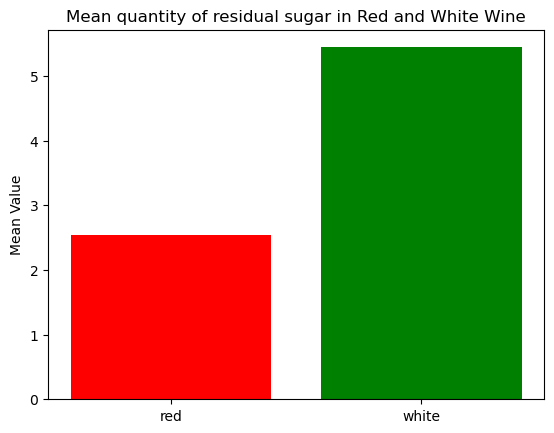

In [68]:
# Residual sugar
plt.bar(["red", "white"], [resSugarRed, resSugarWhite], color=["red","green"])
#plt.ylim(10, 11)  # y-axis will start from 10 and end at 11. to se more specific the decimal values
plt.ylabel("Mean Value")
plt.title("Mean quantity of residual sugar in Red and White Wine")
plt.show()

### are there any correlation between alcohol and quality? | residual_sugar and quality

In [75]:
correlation = DfAllWine[['alcohol', 'residual_sugar', "ph" ,'quality']].corr()
print(correlation)

                 alcohol  residual_sugar        ph   quality
alcohol         1.000000       -0.359415  0.121248  0.444319
residual_sugar -0.359415        1.000000 -0.267320 -0.036980
ph              0.121248       -0.267320  1.000000  0.019506
quality         0.444319       -0.036980  0.019506  1.000000


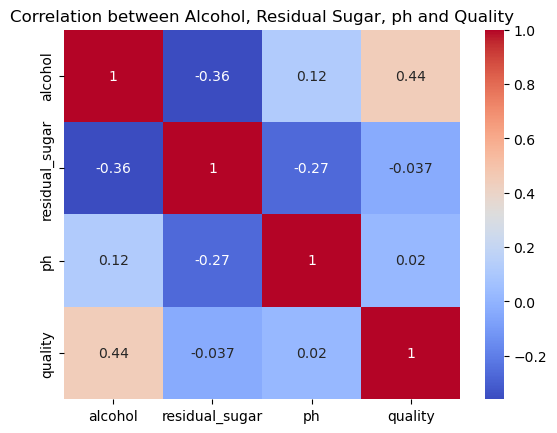

In [76]:
seaborn.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Alcohol, Residual Sugar, ph and Quality')
plt.show()

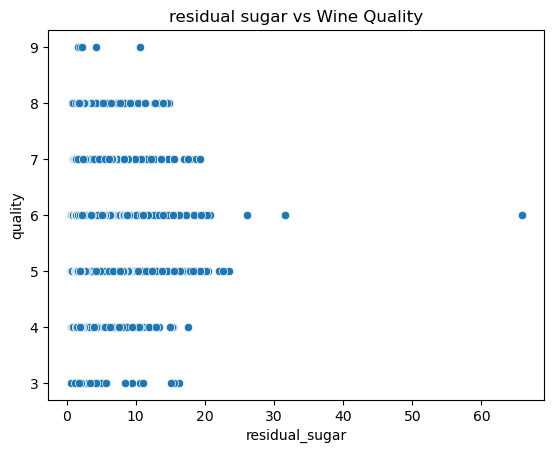

In [ ]:
## plot diagram correlation of alcohol and quality 
#seaborn.scatterplot(data=DfAllWine, x='alcohol', y='quality')
#plt.title('Alcohol vs Wine Quality')
#plt.show()

## plot diagram correlation of residual_sugar and quality 
seaborn.scatterplot(data=DfAllWine, x='residual_sugar', y='quality')
plt.title('residual sugar vs Wine Quality')
plt.show()

#### ANSWER:  there is a little correlation between alchohol and quality. and allmost none with ph and quality

### Binning the PH

In [94]:
bin_data_ph = DfAllWine[['ph']]
bin_data_ph['ph_bin'] = pandas.cut(DfAllWine['ph'], bins=[0.0, 2.8, 5.6, 8.4, 11.2, 14.0], labels=["Very high acid","Medium acid", "allmost neutral", "Medium alkaline", "Very high alkaline"])
#bin_data_ph['ph_bin'] = pandas.cut(DfAllWine['ph'], bins=[0.0, 1.4, 2.8, 4.2, 5.6, 7.0, 8.4, 9.8, 11.2, 12.6, 14.0], labels=["Ext. Acidic", "Very Acidic", "Acidic", "Slight Acid", "Neutral", "Slight Basic", "Basic", "Very Basic", "Ext. Basic", "Super Basic"])
bin_data_ph

C:\Users\vaang\AppData\Local\Temp\ipykernel_11356\1464188645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data_ph['ph_bin'] = pandas.cut(DfAllWine['ph'], bins=[0.0, 2.8, 5.6, 8.4, 11.2, 14.0], labels=["Very high acid","Medium acid", "allmost neutral", "Medium alkaline", "Very high alkaline"])


,ph,ph_bin
0,3.00,Medium acid
1,3.30,Medium acid
2,3.26,Medium acid
3,3.19,Medium acid
4,3.19,Medium acid
...,...,...
6492,3.45,Medium acid
6493,3.52,Medium acid
6494,3.42,Medium acid
6495,3.57,Medium acid


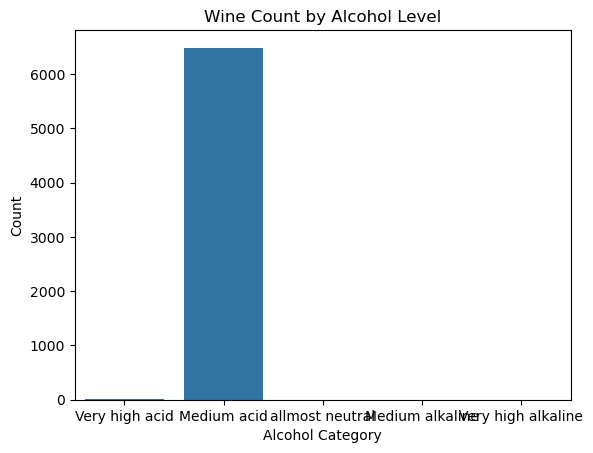

In [95]:
labels=["Very high acid","Medium acid", "allmost neutral", "Medium alkaline", "Very high alkaline"]

seaborn.countplot(data=bin_data_ph, x='ph_bin', order=labels)
plt.title('Wine Count by Alcohol Level')
plt.xlabel('Alcohol Category')
plt.ylabel('Count')
plt.show()

### Correlation between all the features/columns 

In [ ]:
correlationAll = DfAllWine[["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "ph", "sulphates", 'alcohol' ,'quality', ]].corr()
print(correlationAll)

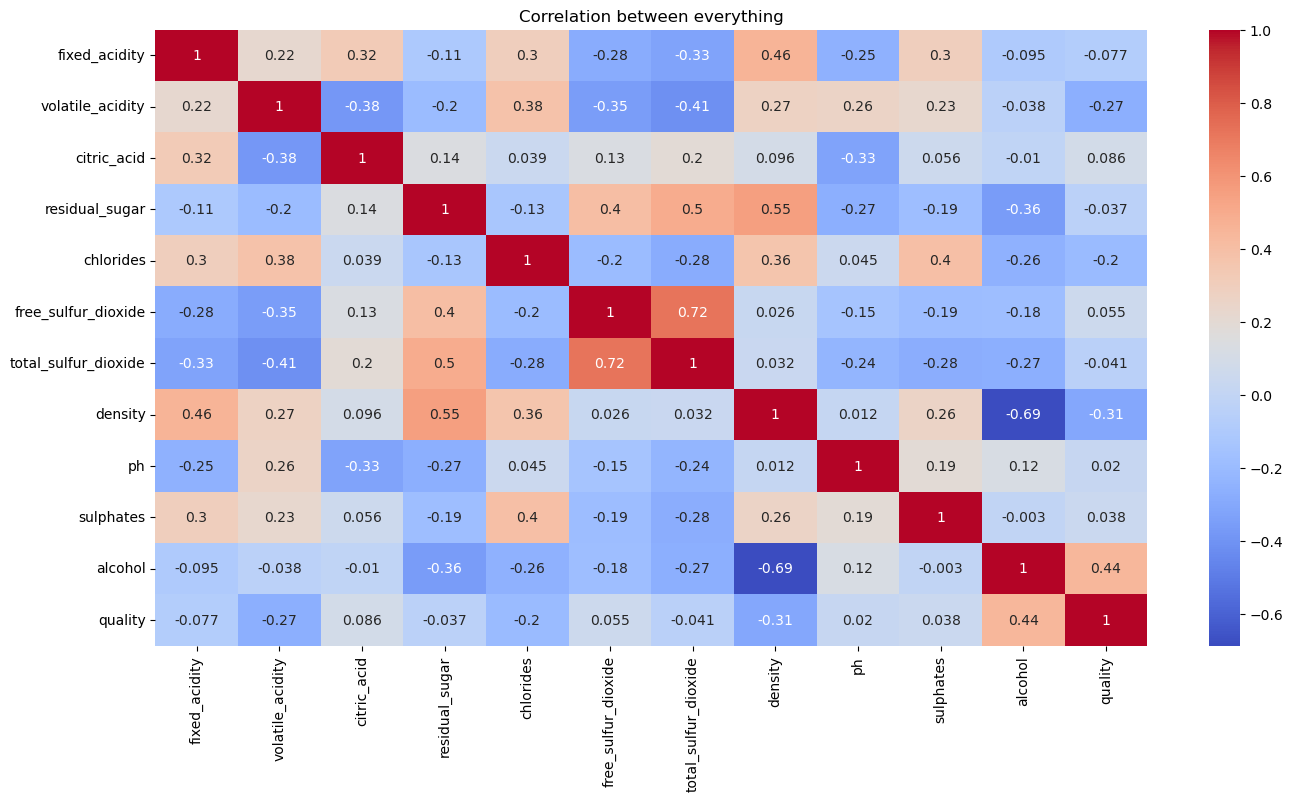

In [ ]:
plt.figure(figsize=(16,8)) # makes the diagram bigger. 
seaborn.heatmap(correlationAll, annot=True, cmap='coolwarm')
plt.title('Correlation between everything')
plt.show()

### ANSWER : PH has the lowest(0.02) influence on the quality and alchohol has the highest (0.44)
### ANSWER : the attributes with the highest correlation is = total_sulfur_dioxcide & free_sulfur_dioxides 

## finding any outliers in "residual_sugar"

In [103]:
upper_limit = DfAllWine["residual_sugar"].quantile(0.95) 
lower_limit = DfAllWine["residual_sugar"].quantile(0.05)

no_outliers = DfAllWine[(DfAllWine["residual_sugar"] < upper_limit) & (DfAllWine["residual_sugar"] > lower_limit) ]
no_outliers

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_type_catagory_code
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,1
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,0


In [104]:
outliers = pandas.concat([DfAllWine, no_outliers]).drop_duplicates(keep=False)
outliers

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_type_catagory_code
12,7.9,0.180,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,0.63,10.8,5,white,1
14,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5,white,1
16,6.3,0.480,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6,white,1
18,7.4,0.340,0.42,1.10,0.033,17.0,171.0,0.99170,3.12,0.53,11.3,6,white,1
26,6.9,0.240,0.35,1.00,0.052,35.0,146.0,0.99300,3.45,0.44,10.0,6,white,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,8.7,0.820,0.02,1.20,0.070,36.0,48.0,0.99520,3.20,0.58,9.8,5,red,0
5378,10.6,0.280,0.39,15.50,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5,red,0
6214,5.4,0.740,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red,0
6219,5.0,0.740,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red,0


In [109]:
outliers.to_csv("../data/outliers.csv")

## remove attributes not correlated with quality 
#### shown before only alchohol is moderate correlated with quality (0.44)

In [ ]:
correlationAllWithoutOutliers = no_outliers[["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "ph", "sulphates", 'alcohol' ,'quality']].corr()



(12, 12)

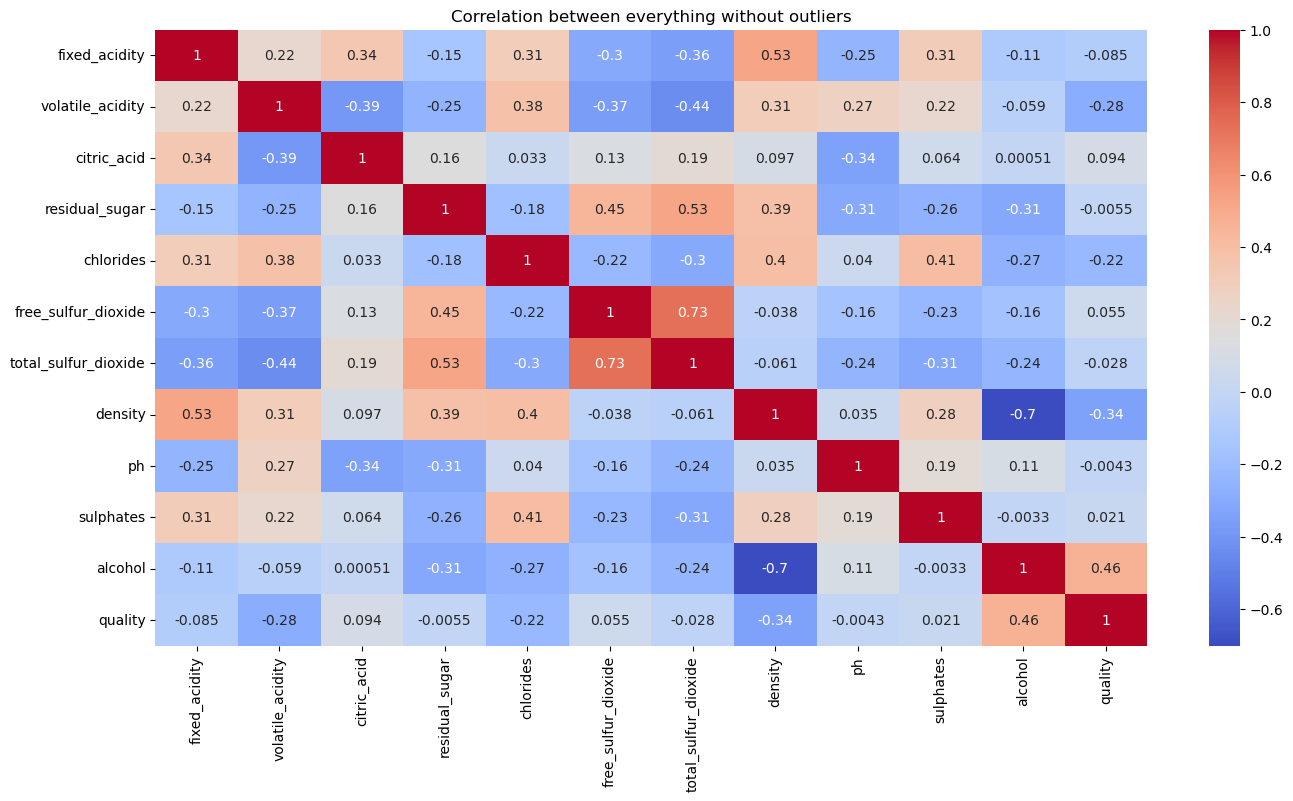

In [115]:
plt.figure(figsize=(16,8)) # makes the diagram bigger. 
seaborn.heatmap(correlationAllWithoutOutliers, annot=True, cmap='coolwarm')
plt.title('Correlation between everything without outliers')
plt.show()

In [120]:
correlatedWithQuality = no_outliers[["alcohol"]]

# Get correlation matrix automatic way.
# correlation_matrix = no_outliers[[
#    "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar",
#    "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density",
#    "ph", "sulphates", "alcohol", "quality"
#]].corr()

# Get correlation of each attribute with 'quality'
#cor_with_quality = correlation_matrix['quality']

# Keep only attributes with abs(correlation) >= 0.44
#strong_corr = cor_with_quality[cor_with_quality.abs() >= 0.44]

# Drop 'quality' itself if needed
#strong_corr = strong_corr.drop('quality', errors='ignore')

# Result: attributes with "high" correlation to quality
#print(strong_corr)

### normalized the data so we can apply PCA

In [135]:
no_outliers.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_type_catagory_code
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,1


In [136]:
no_outliers_data = no_outliers.drop("wine_type", axis=1)
data_array = no_outliers_data.values # this makes our DF to an array
normalize1 = prep.normalize(data_array, norm="l1")
normalize1

array([[0.0358213 , 0.00170578, 0.00193321, ..., 0.05401625, 0.03411553,
        0.00568592],
       [0.04923261, 0.00170187, 0.00243124, ..., 0.06138881, 0.0364686 ,
        0.0060781 ],
       [0.02658852, 0.00084936, 0.00118171, ..., 0.03655921, 0.0221571 ,
        0.00369285],
       ...,
       [0.06269796, 0.00507555, 0.00129377, ..., 0.10947263, 0.05971234,
        0.        ],
       [0.0560754 , 0.00613028, 0.00114052, ..., 0.09694392, 0.04752153,
        0.        ],
       [0.06487013, 0.00335162, 0.00508149, ..., 0.11892857, 0.06487013,
        0.        ]])

### Standard scaling our values 

In [124]:
standardScaler = prep.StandardScaler()
data_array = standardScaler.fit_transform(data_array)
data_array

array([[-0.86843054],
       [-0.36294786],
       [-0.53144208],
       ...,
       [ 0.39527617],
       [-0.27870074],
       [ 0.39527617]])

### using min-max scaling

In [137]:
minMax = prep.MinMaxScaler()
data_array = minMax.fit_transform(data_array)
data_array

array([[0.20661157, 0.14666667, 0.20481928, ..., 0.2173913 , 0.5       ,
        1.        ],
       [0.3553719 , 0.13333333, 0.24096386, ..., 0.30434783, 0.5       ,
        1.        ],
       [0.28099174, 0.1       , 0.19277108, ..., 0.27536232, 0.5       ,
        1.        ],
       ...,
       [0.20661157, 0.28666667, 0.07831325, ..., 0.43478261, 0.5       ,
        0.        ],
       [0.17355372, 0.37666667, 0.07228916, ..., 0.31884058, 0.33333333,
        0.        ],
       [0.18181818, 0.15333333, 0.28313253, ..., 0.43478261, 0.5       ,
        0.        ]])

In [138]:
pca = PCA()
pcaData = pca.fit_transform(data_array)
pcaData

array([[ 0.19039812, -0.21458616, -0.25843309, ..., -0.02315759,
        -0.05136555,  0.02342326],
       [ 0.28232461,  0.07165705, -0.00817721, ...,  0.01235462,
         0.0377772 , -0.03926008],
       [ 0.37841863,  0.20127049, -0.00171737, ...,  0.03820489,
        -0.01522438, -0.0108712 ],
       ...,
       [-0.7807308 , -0.0518511 ,  0.10377957, ..., -0.00948149,
         0.02928528,  0.05227251],
       [-0.8118712 , -0.01189266, -0.07574228, ..., -0.03295501,
         0.05697621, -0.0064227 ],
       [-0.71347265,  0.0066493 ,  0.16392634, ..., -0.04521515,
        -0.01877715,  0.04622666]])

In [139]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.56394053, 0.20612971, 0.07179279, 0.04818327, 0.03221259,
       0.02062404, 0.01587693, 0.0132575 , 0.01108363, 0.00786623,
       0.00446737, 0.00311269, 0.00145272])

C:\Users\vaang\AppData\Local\Temp\ipykernel_11356\1406135175.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(explained_variance, 'bx-', c='red')


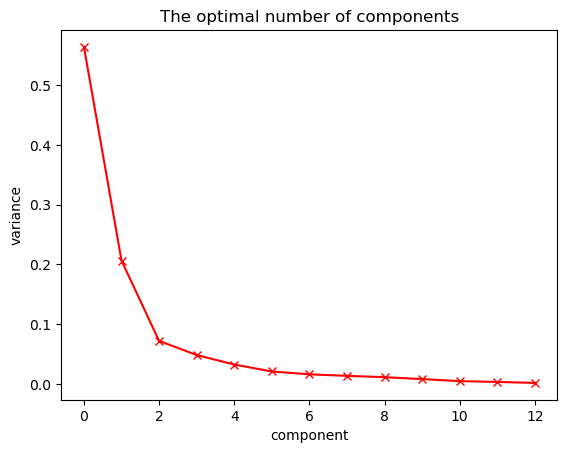

In [140]:
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

C:\Users\vaang\AppData\Local\Temp\ipykernel_11356\1176320414.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b*-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(cumulative, 'b*-', c='green')


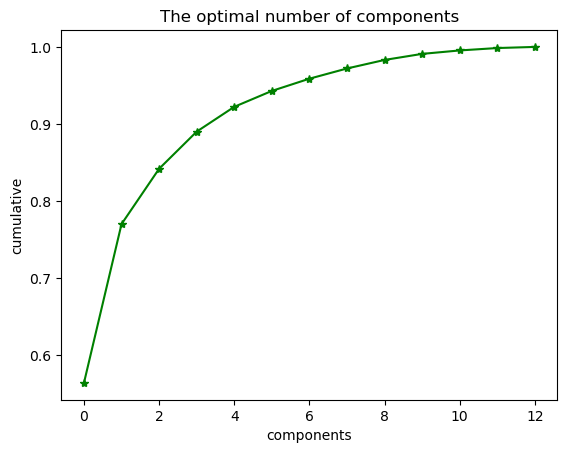

In [141]:
# Plot the cumulative explained_variance
cumulative = numpy.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

In [142]:
pca = PCA(n_components=5)
pcaData = pca.fit_transform(data_array)
pcaData

array([[ 0.19039812, -0.21458616, -0.25843309,  0.01750031,  0.15767545],
       [ 0.28232461,  0.07165705, -0.00817721, -0.03382829,  0.04915733],
       [ 0.37841863,  0.20127049, -0.00171737,  0.00662073,  0.05850589],
       ...,
       [-0.7807308 , -0.0518511 ,  0.10377957,  0.1764369 ,  0.02862951],
       [-0.8118712 , -0.01189266, -0.07574228,  0.3220727 , -0.01742849],
       [-0.71347265,  0.0066493 ,  0.16392634,  0.09065091,  0.0521649 ]])

In [ ]:
pcaDF = pandas.DataFrame(data = pcaData, columns= ["component 1", "component 2", "component 3", "component 4", "component 5"])
pcaDF


,component 1,component 2,component 3,component 4,component 5
0,0.190398,-0.214586,-0.258433,0.017500,0.157675
1,0.282325,0.071657,-0.008177,-0.033828,0.049157
2,0.378419,0.201270,-0.001717,0.006621,0.058506
3,0.378419,0.201270,-0.001717,0.006621,0.058506
4,0.282325,0.071657,-0.008177,-0.033828,0.049157
...,...,...,...,...,...
5638,-0.791166,-0.037558,-0.047850,0.248614,-0.089024
5639,-0.778635,-0.093687,0.115920,0.271474,0.038976
5640,-0.780731,-0.051851,0.103780,0.176437,0.028630
5641,-0.811871,-0.011893,-0.075742,0.322073,-0.017428
